In [1]:
import numpy as np
import pandas as pd

In [33]:
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

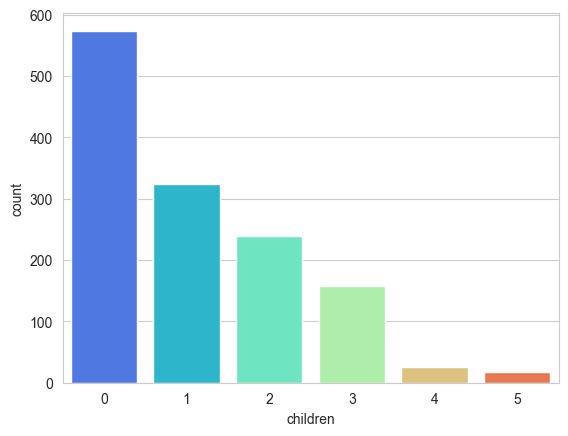

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='children',data=data,palette='rainbow')

<AxesSubplot:xlabel='region', ylabel='count'>

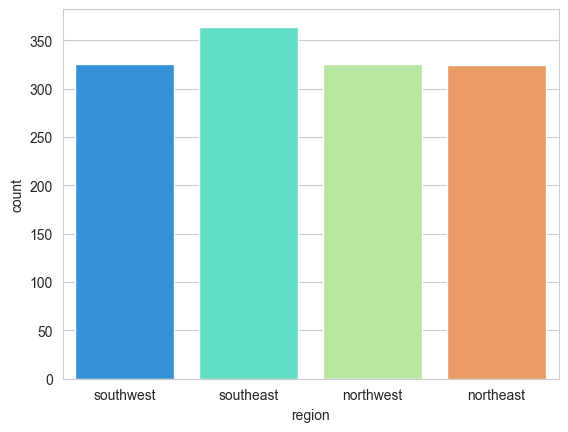

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='region',data=data,palette='rainbow')

<AxesSubplot:xlabel='region', ylabel='count'>

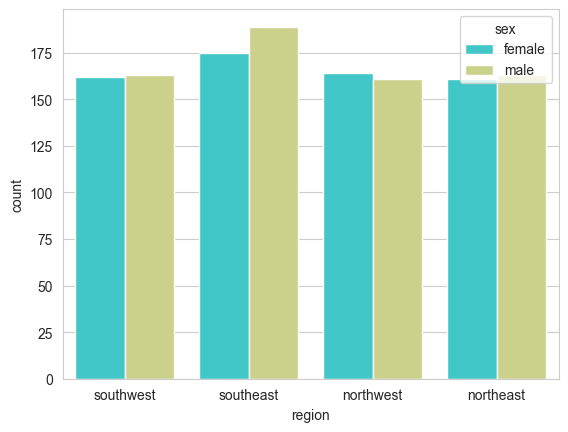

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='region',hue='sex',data=data,palette='rainbow')

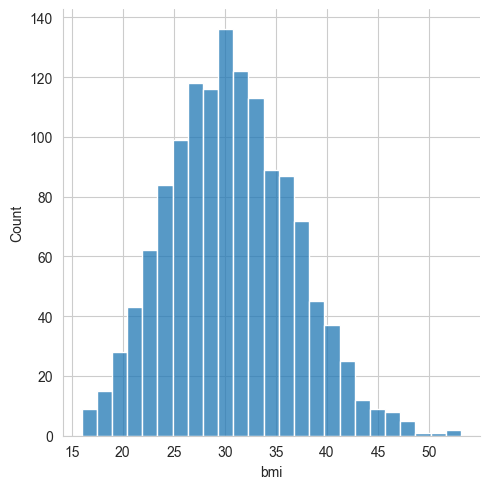

In [62]:
sns.displot(data['bmi'])

<AxesSubplot:xlabel='sex', ylabel='age'>

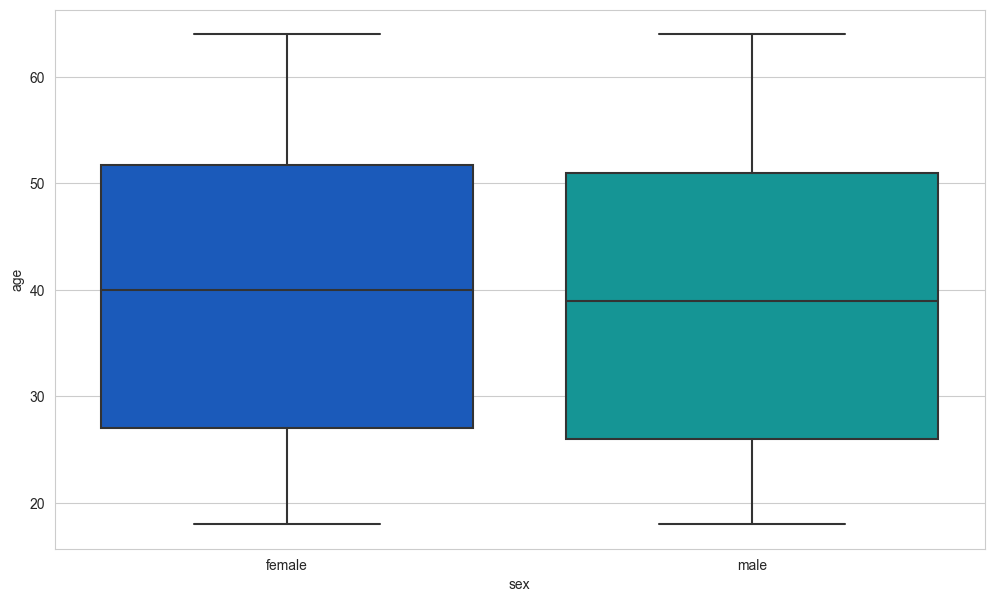

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(x='sex',y='age',data=data,palette='winter')

<AxesSubplot:xlabel='children', ylabel='count'>

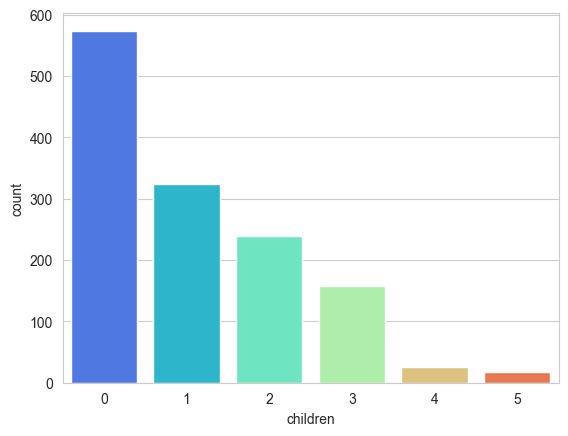

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='children',data=data,palette='rainbow')

<AxesSubplot:xlabel='smoker', ylabel='count'>

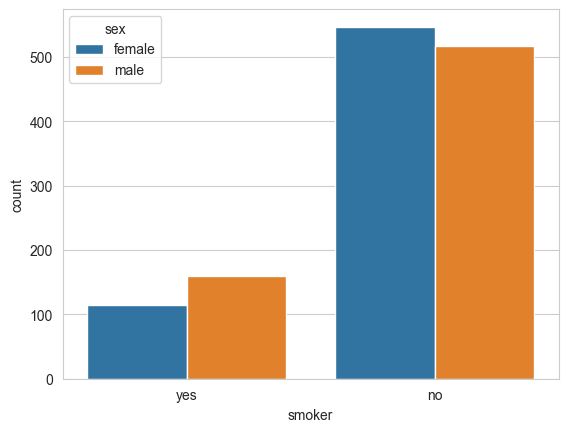

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='smoker',hue='sex',data=data)

C:\Users\nidhi\AppData\Local\Temp\ipykernel_21416\3901069661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="Blues")


<AxesSubplot:>

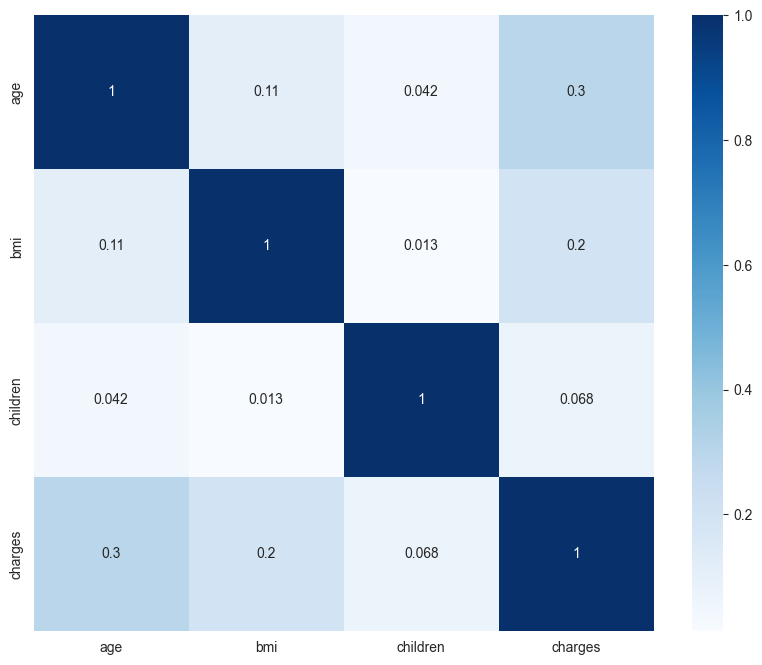

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

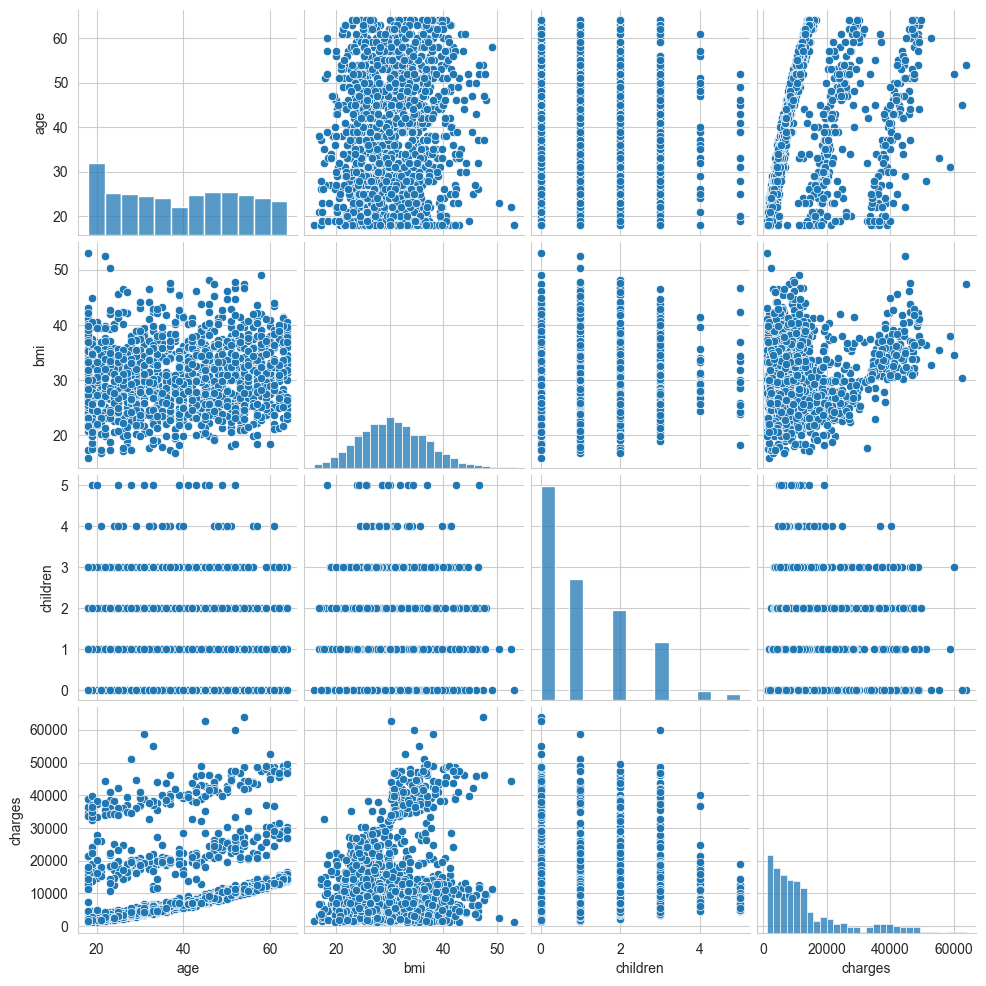

In [58]:
sns.pairplot(data)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

In [9]:
encoded_data1=ct1.fit_transform(data)

In [11]:
# Convert encoded data to dataframe
encoded_df1=pd.DataFrame(encoded_data1,columns=ct1.get_feature_names_out())

In [12]:
encoded_df1

,encoder__sex_female,encoder__sex_male,remainder__age,remainder__bmi,remainder__children,remainder__smoker,remainder__region,remainder__charges
0,1.0,0.0,19,27.9,0,yes,southwest,16884.924
1,0.0,1.0,18,33.77,1,no,southeast,1725.5523
2,0.0,1.0,28,33.0,3,no,southeast,4449.462
3,0.0,1.0,33,22.705,0,no,northwest,21984.47061
4,0.0,1.0,32,28.88,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,50,30.97,3,no,northwest,10600.5483
1334,1.0,0.0,18,31.92,0,no,northeast,2205.9808
1335,1.0,0.0,18,36.85,0,no,southeast,1629.8335
1336,1.0,0.0,21,25.8,0,no,southwest,2007.945


In [20]:
ct2=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5])],remainder='passthrough')

In [21]:
encoded_data2=ct2.fit_transform(encoded_df1)

In [22]:
# Convert encoded data to dataframe
encoded_df2=pd.DataFrame(encoded_data2,columns=ct2.get_feature_names_out())

In [23]:
encoded_df2

,encoder__remainder__smoker_no,encoder__remainder__smoker_yes,remainder__encoder__sex_female,remainder__encoder__sex_male,remainder__remainder__age,remainder__remainder__bmi,remainder__remainder__children,remainder__remainder__region,remainder__remainder__charges
0,0.0,1.0,1.0,0.0,19,27.9,0,southwest,16884.924
1,1.0,0.0,0.0,1.0,18,33.77,1,southeast,1725.5523
2,1.0,0.0,0.0,1.0,28,33.0,3,southeast,4449.462
3,1.0,0.0,0.0,1.0,33,22.705,0,northwest,21984.47061
4,1.0,0.0,0.0,1.0,32,28.88,0,northwest,3866.8552
...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,50,30.97,3,northwest,10600.5483
1334,1.0,0.0,1.0,0.0,18,31.92,0,northeast,2205.9808
1335,1.0,0.0,1.0,0.0,18,36.85,0,southeast,1629.8335
1336,1.0,0.0,1.0,0.0,21,25.8,0,southwest,2007.945


In [24]:
encoded_df2.columns = ['Non-Smoker', 'Smoker', 'Female','Male','Age','BMI','Children','Region','Charges']

In [25]:
encoded_df2

,Non-Smoker,Smoker,Female,Male,Age,BMI,Children,Region,Charges
0,0.0,1.0,1.0,0.0,19,27.9,0,southwest,16884.924
1,1.0,0.0,0.0,1.0,18,33.77,1,southeast,1725.5523
2,1.0,0.0,0.0,1.0,28,33.0,3,southeast,4449.462
3,1.0,0.0,0.0,1.0,33,22.705,0,northwest,21984.47061
4,1.0,0.0,0.0,1.0,32,28.88,0,northwest,3866.8552
...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,50,30.97,3,northwest,10600.5483
1334,1.0,0.0,1.0,0.0,18,31.92,0,northeast,2205.9808
1335,1.0,0.0,1.0,0.0,18,36.85,0,southeast,1629.8335
1336,1.0,0.0,1.0,0.0,21,25.8,0,southwest,2007.945


In [26]:
ct3=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7])],remainder='passthrough')

In [27]:
encoded_data3=ct3.fit_transform(encoded_df2)

In [29]:
# Convert encoded data to dataframe
encoded_df3=pd.DataFrame(encoded_data3,columns=ct3.get_feature_names_out())

In [30]:
encoded_df3

,encoder__Region_northeast,encoder__Region_northwest,encoder__Region_southeast,encoder__Region_southwest,remainder__Non-Smoker,remainder__Smoker,remainder__Female,remainder__Male,remainder__Age,remainder__BMI,remainder__Children,remainder__Charges
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,19,27.9,0,16884.924
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,18,33.77,1,1725.5523
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,28,33.0,3,4449.462
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,33,22.705,0,21984.47061
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,32,28.88,0,3866.8552
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50,30.97,3,10600.5483
1334,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18,31.92,0,2205.9808
1335,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,18,36.85,0,1629.8335
1336,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21,25.8,0,2007.945


In [31]:
encoded_df3.columns = ['Northeast','Northwest','Southeast','Southwest','Non-Smoker', 'Smoker', 'Female','Male','Age','BMI','Children','Charges']

In [32]:
encoded_df3

,Northeast,Northwest,Southeast,Southwest,Non-Smoker,Smoker,Female,Male,Age,BMI,Children,Charges
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,19,27.9,0,16884.924
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,18,33.77,1,1725.5523
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,28,33.0,3,4449.462
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,33,22.705,0,21984.47061
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,32,28.88,0,3866.8552
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50,30.97,3,10600.5483
1334,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18,31.92,0,2205.9808
1335,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,18,36.85,0,1629.8335
1336,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21,25.8,0,2007.945


In [78]:
encoded_df3['Charges']=encoded_df3['Charges'].astype(float)

In [79]:
x=encoded_df3.drop(['Charges'],axis=1)
y=encoded_df3['Charges']

In [80]:
x.head()

,Northeast,Northwest,Southeast,Southwest,Non-Smoker,Smoker,Female,Male,Age,BMI,Children
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,19,27.9,0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,18,33.77,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,28,33.0,3
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,33,22.705,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,32,28.88,0


In [81]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: Charges, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [84]:
model=LinearRegression().fit(x_train,y_train)

In [85]:
y_pred=model.predict(x_test)

In [86]:
# Evaluating the model performance
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=model.score(x_test,y_test)

In [87]:
print("Mean Squared error:",mse)
print("Root mean squared error:",rmse)
print("Mean Absolute error:",mae)
print("R-squared:",r2)

Mean Squared error: 33596915.85136146
Root mean squared error: 5796.2846592762735
Mean Absolute error: 4181.19447375365
R-squared: 0.7835929767120723


In [88]:
print(model.intercept_)

-574.5357125102237


In [89]:
print(model.coef_)

[ 4.59585244e+02  8.89079180e+01 -1.98279052e+02 -3.50214110e+02
 -1.18255644e+04  1.18255644e+04  9.29584582e+00 -9.29584582e+00
  2.56975706e+02  3.37092552e+02  4.25278784e+02]


In [90]:
# Cross Validate the score
from sklearn.model_selection import cross_val_score
pred=cross_val_score(model,x,y,cv=10)
print("Cross Validation: ",pred.mean())

Cross Validation:  0.7445006998667603


Text(0, 0.5, 'Predicted Values')

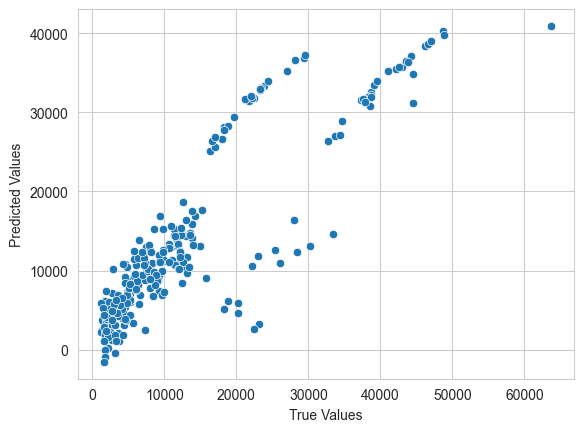

In [91]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

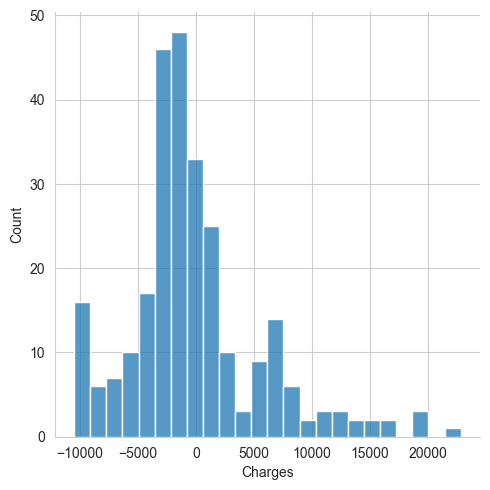

In [92]:
sns.displot(data=(y_test-y_pred))